In [1]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
import sys
from sklearn.cluster import KMeans

#Scripts para leer y procesar imagen
sys.path.insert(0, '../Golden Master (AS IS)')
import readImage
import preProcessing as pP
import sorts as srt
import perspective as pPe
import indAnalysis as inA
import writeImage2

Im happy...


In [2]:
#leer una imagen de prueba
batch = False
qr = '601170500100157'
qr_count = 1

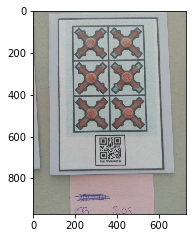

In [3]:
#Read from local file local = True, from db local = False, count = Test repeated
imgBGR = readImage.readImage(qr, local = False, count = qr_count)
if(isinstance(imgBGR, str)):
    print(imgBGR)
else: 
    # show the original image
    if (not batch):
     plt.subplot(121),plt.imshow(cv2.cvtColor(imgBGR,cv2.COLOR_BGR2RGB))
     plt.show()

In [4]:
imgBGR.shape

(970, 728, 3)

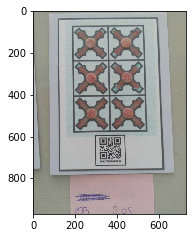

In [5]:
# Convert BGR to HSV
imgHSV = cv2.cvtColor(imgBGR, cv2.COLOR_BGR2HSV)
plt.subplot(121),plt.imshow(cv2.cvtColor(imgHSV,cv2.COLOR_HSV2RGB))
plt.show()

In [6]:
#Red in HSV spans two color wheel ranges: 
#   aprox 340 to 360 and 0 to 20 
# H = H/2 in openCV (to fit 360 into one byte)
mask1 = cv2.inRange(imgHSV, np.array([0, 70, 50]), np.array([10, 255, 255]));
mask2 = cv2.inRange(imgHSV, np.array([170, 70, 50]), np.array([180, 255, 255]));
mask = mask1 | mask2
mask.shape

(970, 728)

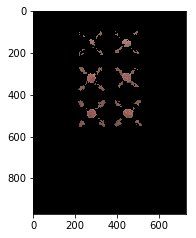

In [7]:
res = cv2.bitwise_and(imgBGR,imgBGR, mask= mask)
plt.subplot(121), plt.imshow(cv2.cvtColor(res,cv2.COLOR_BGR2RGB))
plt.show()

https://stackoverflow.com/questions/32522989/opencv-better-detection-of-red-color
https://stackoverflow.com/questions/43915852/using-histogram-to-determine-colored-object-presence/43926013#43926013

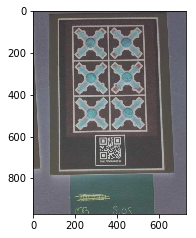

In [8]:
#Inverting BGR image and looking for Cyan
#Red one's complement corresponds to Cyan in HSV
imgBGR_inv = ~imgBGR
plt.subplot(121), plt.imshow(cv2.cvtColor(imgBGR_inv,cv2.COLOR_BGR2RGB))
plt.show()

In [9]:
#Use XM Statistics notebook to learn these parameters
#Assumption: Cyan cluster can be modeled as mixture of 3 gaussians
#Photoshop "fuzzyness" currently aproximated by gaussian "width"/dev
from __future__ import division
cyan_cluster_mean = 90
cmean = cyan_cluster_mean
cyan_cluster_std = 10
non_cyan_exclude_saturation = 15
exc_sat_low = non_cyan_exclude_saturation
non_cyan_exclude_value = 240
exc_val_high = non_cyan_exclude_value
percentage_of_cyan = 65
cyan_cluster_dev = (3 * cyan_cluster_std / 100) * percentage_of_cyan
cdev = cyan_cluster_dev
cdev

19.5

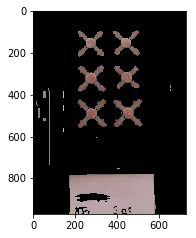

In [10]:
#Cyan is 90 in HSV
imgHSV_inv = cv2.cvtColor(imgBGR_inv, cv2.COLOR_BGR2HSV)
mask3 = cv2.inRange(imgHSV_inv, np.array([cmean-cdev, exc_sat_low, 0]), np.array([cmean+cdev, 255, exc_val_high]));
res2 = cv2.bitwise_and(imgBGR,imgBGR, mask= mask3)
plt.subplot(121), plt.imshow(cv2.cvtColor(res2,cv2.COLOR_BGR2RGB))
plt.show()